# Taller Pandas
## Carlos Romero

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data0=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
data0

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


***1. Diga qué índices serían pertinentes tener y póngalos***

In [3]:
data0.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

Para efectos del taller, sería pertinente mantener 'year', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is' y 'Ir'

In [4]:
data1 = pd.DataFrame(data0[['year', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is','Ir']])
data1

,year,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
43819,2014,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,8.0,-22,-4.0,1034.0,NW,246.72,0,0


***2. Elimine registros que tengan NA en la columna "pm2.5"***

Es útil saber cuántos NA hay en "pm2.5":

In [5]:
data1.isna().sum()

year        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
data1 = data1[pd.notnull(data1['pm2.5'])]
data1
print(data1.shape)

(41757, 9)


***3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.***

Agrupamos por año:

In [7]:
grouped_data1 = data1.groupby('year')

Descriptivos para pm2.5: PM2.5 concentration (ug/m^3)

In [8]:
grouped_data1['pm2.5'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,104.045730,92.281185,1.0,35.0,79.0,147.0,980.0
2011,8032.0,99.071340,92.967298,2.0,27.0,71.0,139.0,595.0
2012,8295.0,90.545871,81.745087,0.0,25.0,69.0,132.0,994.0
2013,8678.0,101.712376,98.070477,2.0,32.0,71.5,138.0,886.0
2014,8661.0,97.734557,93.531528,2.0,28.0,72.0,133.0,671.0


<AxesSubplot:title={'center':'pm2.5'}, xlabel='year'>

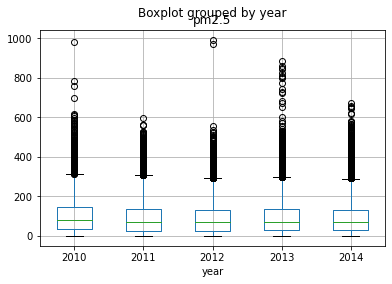

In [9]:
data1.boxplot(by ='year', column =['pm2.5'], grid = True)

Descriptivos para DEWP: Dew Point (â„ƒ)

In [10]:
grouped_data1['DEWP'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,1.352120,14.584996,-28.0,-11.0,1.0,15.0,28.0
2011,8032.0,2.033118,14.503209,-27.0,-10.0,2.0,16.0,28.0
2012,8295.0,1.953707,14.561339,-28.0,-11.0,3.0,15.0,27.0
2013,8678.0,1.342590,14.360272,-33.0,-11.0,0.0,15.0,26.0
2014,8661.0,2.073086,14.159683,-40.0,-9.0,4.0,15.0,25.0


<AxesSubplot:title={'center':'DEWP'}, xlabel='year'>

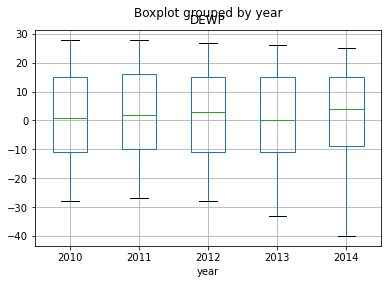

In [11]:
data1.boxplot(by ='year', column =['DEWP'], grid = True)

Descriptivos para TEMP: Temperature (â„ƒ)

In [12]:
grouped_data1['TEMP'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,11.313805,12.684701,-19.0,0.0,11.0,23.0,41.0
2011,8032.0,12.407869,12.095837,-15.0,2.0,14.0,23.0,36.0
2012,8295.0,12.109946,12.339970,-17.0,1.0,14.0,23.0,38.0
2013,8678.0,12.383614,12.033222,-17.0,2.0,13.0,23.0,38.0
2014,8661.0,13.709156,11.616259,-13.0,3.0,15.0,23.0,42.0


<AxesSubplot:title={'center':'TEMP'}, xlabel='year'>

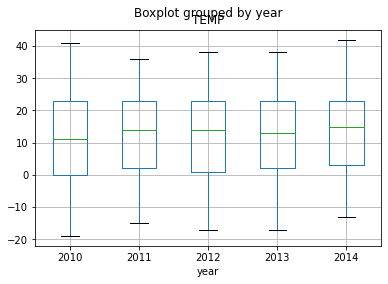

In [13]:
data1.boxplot(by ='year', column =['TEMP'], grid = True)

Descriptivos para PRES: Pressure (hPa)

In [14]:
grouped_data1['PRES'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,1016.291373,9.797649,994.0,1009.0,1015.0,1023.0,1043.0
2011,8032.0,1017.461653,11.296902,993.0,1007.0,1018.0,1027.0,1045.0
2012,8295.0,1016.080289,10.025194,992.0,1008.0,1016.0,1024.0,1041.0
2013,8678.0,1015.817066,10.506757,991.0,1007.0,1016.0,1024.0,1046.0
2014,8661.0,1016.614017,9.756248,993.0,1008.0,1016.0,1025.0,1039.0


<AxesSubplot:title={'center':'PRES'}, xlabel='year'>

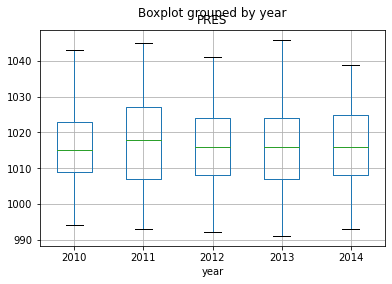

In [15]:
data1.boxplot(by ='year', column =['PRES'], grid = True)

Descriptivos para cbwd: Combined wind direction

In [16]:
grouped_data1['cbwd'].describe()

,count,unique,top,freq
year,,,,
2010,8091,4,NW,2887
2011,8032,4,NW,2900
2012,8295,4,SE,2930
2013,8678,4,SE,3025
2014,8661,4,SE,3186


Descriptivos para Iws: Cumulated wind speed (m/s)

In [17]:
grouped_data1['Iws'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,29.214860,56.150098,0.45,1.79,7.14,27.72,565.49
2011,8032.0,25.491912,49.820456,0.45,1.79,6.25,24.13,445.66
2012,8295.0,24.610321,49.794085,0.45,1.79,5.81,24.14,454.62
2013,8678.0,21.058177,47.598791,0.45,1.79,4.92,18.79,490.38
2014,8661.0,19.465400,43.837185,0.45,1.79,4.90,17.00,441.18


<AxesSubplot:title={'center':'Iws'}, xlabel='year'>

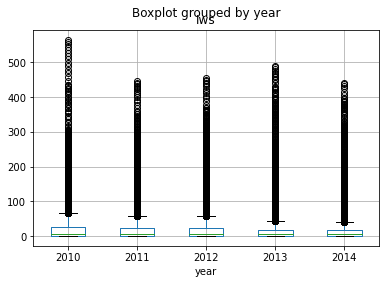

In [18]:
data1.boxplot(by ='year', column =['Iws'], grid = True)

Descriptivos para Is: Cumulated hours of snow

In [19]:
grouped_data1['Is'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,0.077123,1.019457,0.0,0.0,0.0,0.0,27.0
2011,8032.0,0.056399,0.748339,0.0,0.0,0.0,0.0,20.0
2012,8295.0,0.076070,0.866199,0.0,0.0,0.0,0.0,19.0
2013,8678.0,0.035262,0.460145,0.0,0.0,0.0,0.0,11.0
2014,8661.0,0.034292,0.708804,0.0,0.0,0.0,0.0,23.0


<AxesSubplot:title={'center':'Is'}, xlabel='year'>

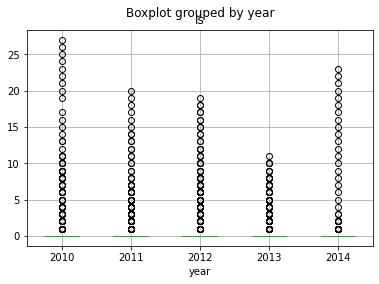

In [20]:
data1.boxplot(by ='year', column =['Is'], grid = True)

Descriptivos para Ir: Cumulated hours of rain

In [21]:
grouped_data1['Ir'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,0.269312,1.836257,0.0,0.0,0.0,0.0,36.0
2011,8032.0,0.149278,1.110730,0.0,0.0,0.0,0.0,23.0
2012,8295.0,0.265943,1.766490,0.0,0.0,0.0,0.0,32.0
2013,8678.0,0.161904,1.150911,0.0,0.0,0.0,0.0,25.0
2014,8661.0,0.132548,1.034723,0.0,0.0,0.0,0.0,23.0


<AxesSubplot:title={'center':'Ir'}, xlabel='year'>

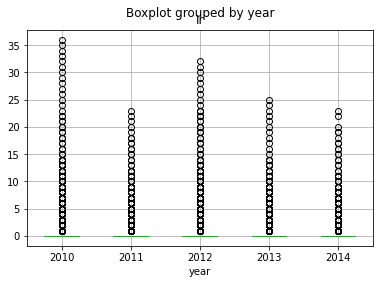

In [22]:
data1.boxplot(by ='year', column =['Ir'], grid = True)

***4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?***


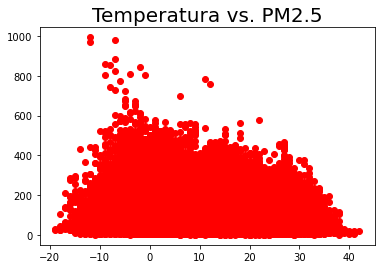

In [23]:
fig, graf = plt.subplots()
graf.set_title('Temperatura vs. PM2.5', fontsize = 20)
graf.scatter(x = data1['TEMP'], y = data1['pm2.5'], color = 'red')
plt.show()

La concentración de PM2.5 parece ser mayor en temperaturas entre -10 y 10; en la medida que aumenta la temperatura despúes de los 10, la concentración de PM2.5 parece disminuir

***5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120***

In [24]:
prob_mayor_120 = len(data1[data1['pm2.5'] > 120])/len(data1)
prob_mayor_120

0.2989438896472448

***6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.***

In [26]:
data1.groupby('year')['pm2.5'].mean().sort_values()

year
2012     90.545871
2014     97.734557
2011     99.071340
2013    101.712376
2010    104.045730
Name: pm2.5, dtype: float64